# Pandas 4 (Visualization)

We have already seen some plotting methods in Pandas. In particular, we built bar plots using

> Series.plot(kind='bar')

In this lecture, we will consider more plotting options. Python's matplotlib module offers a broad range of plotting options, but we will focus on the pandas methods. Specifically, we will look at:

* Scatter plots,
* Line plots,
* Histograms, and
* Bar plots.

A lot of this is inspired by the visualization tutorial [here](https://github.com/ResearchComputing/Meetup-Fall-2013).

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Scatter plots

This is the easiest, and often the first plot we draw. The goal is to just see how two types of items are related. Let's see an example.

In [2]:
cars = pd.read_csv('Pandas_4_data/cars.csv').dropna()
cars[:5]

,type,mpg,cyl,disp,hp,wt,speed,wt.1
0,AMC Ambassador Brougham,13.0,8,360.0,175.0,3821,11.0,73
1,AMC Ambassador DPL,15.0,8,390.0,190.0,3850,8.5,70
2,AMC Ambassador SST,17.0,8,304.0,150.0,3672,11.5,72
3,AMC Concord DL 6,20.2,6,232.0,90.0,3265,18.2,79
4,AMC Concord DL,18.1,6,258.0,120.0,3410,15.1,78


### Is MPG related to weight?

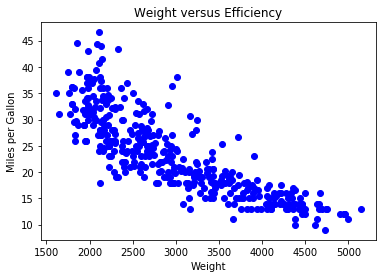

In [3]:
plot(cars['wt'], cars['mpg'], marker='o', color='blue', linestyle='None')
xlabel('Weight')
ylabel('Miles per Gallon')
title('Weight versus Efficiency')
show()

Each point in the plot represents one particular car type. Clearly, increasing weight hurts MPG.

Let's look a little more closely at the plot() function

    plot(cars['wt'], cars['mpg'], marker='o', color='blue', linestyle='None')

The first two arguments specify the x-axis and the y-axis, but what are the rest?

* marker='o' means we want each car to be plotted as a circle. We could alternately have chosen
    * marker='s' for square marks
    * marker='p' for pentagons
    * marker='.' for points
    * marker='^' for upward-pointing triangle, and on and on.

* color='blue' is pretty straightforward.

* linestyle='None' says we do not want consecutive cars to be connected by lines. In our case, the ordering of the cars doesn't matter; otherwise we could have chosen:
    * linestyle='-' for plain line
    * linestyle='--' for dashed line
    * linestyle='-.' for dotted-dashed line, and many others.

### How are mpg, weight, and number of cylinders related?

Let us first group cars into 4-, 6-, and 8-cylinder ones.

In [4]:
c4 = cars[cars['cyl'] == 4]
c6 = cars[cars['cyl'] == 6]
c8 = cars[cars['cyl'] == 8]

One option would be to plot each individually, but we can also plot all of them together.

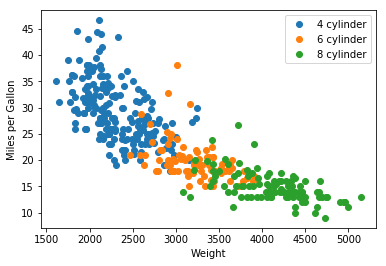

In [5]:
plot(c4['wt'], c4['mpg'], marker='o', linestyle='None', label='4 cylinder')
plot(c6['wt'], c6['mpg'], marker='o', linestyle='None', label='6 cylinder')
plot(c8['wt'], c8['mpg'], marker='o', linestyle='None', label='8 cylinder')
xlabel('Weight')
ylabel('Miles per Gallon')
legend(numpoints=1, loc='best')
show()

* So cars with more cylinders have higher weights and are less efficient (/shrug).
* Notice that we did not need to specify different colors in the calls to plot().
    * Python automatically cycles through a set of colors.

Suppose we really wanted to plot these three types of cars on three separate plots. How do we do it?

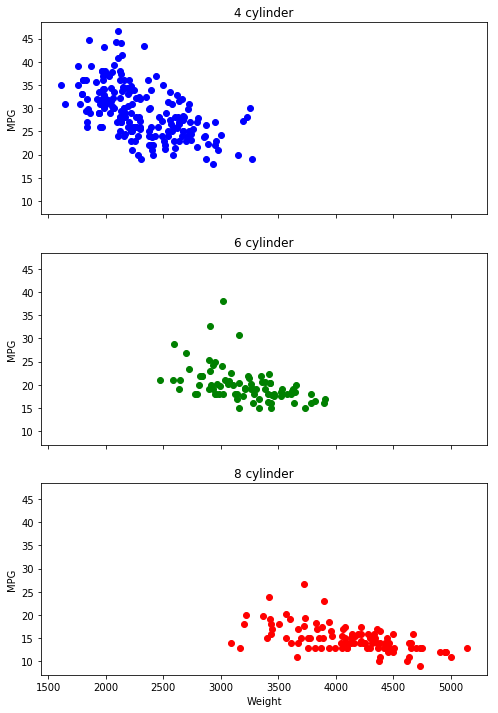

In [6]:
# First, create a blank figure and "axis" objects
fig, (ax1, ax2, ax3) = subplots(nrows=3,
                                ncols=1,
                                sharex=True,
                                sharey=True,
                                figsize=(8, 12))

# Each "axis" object corresponds to one subplot
# Fill in the subplots.
ax1.plot(c4['wt'], c4['mpg'], marker='o', color='blue', linestyle='None')
ax1.set_title('4 cylinder')
ax1.set_ylabel('MPG')

ax2.plot(c6['wt'], c6['mpg'], marker='o', color='green', linestyle='None')
ax2.set_title('6 cylinder')
ax2.set_ylabel('MPG')

ax3.plot(c8['wt'], c8['mpg'], marker='o', color='red', linestyle='None')
ax3.set_title('8 cylinder')
ax3.set_ylabel('MPG')
ax3.set_xlabel('Weight')

show()

Let us understand this in more details.

    fig, (ax1, ax2, ax3) = subplots(nrows=3,
                                    ncols=1,
                                    sharex=True,
                                    sharey=True,
                                    figsize=(8, 12))

* This creates an empty figure object called fig.

* Setting nrows=3 and ncols=1 means
    * this figure object will contain 3 subplots (assigned to ax1, ax2, and ax3)
    * laid out in 3 rows and 1 column (i.e., stacked on top of each other).

* sharex=True and sharey=True means
    * all three subplots will have the same range of x-values and y-values
    * so they will be aligned.

* figsize=(8, 12) says that the figure size will be 8 inches wide and 12 inches tall
    * This is something you must play with to see what works best.

Now we have an empty figure with space for three subplots. The subplot objects are ax1, ax2, and ax3, and we will "fill in" these subplots by calling plot() on these subplot objects.

    ax1.plot(c4['wt'], c4['mpg'], marker='o', color='blue', linestyle='None')
    ax1.set_title('4 cylinder')
    ax1.set_ylabel('MPG')

1. First line is easy: we do our plot.
2. set_title and set_ylabel are obvious.

And finally:

    Call the show() method

## Line plots

Another common situation is plotting data over time. If each row in a DataFrame represents time, then there is a natural _ordering_ of rows. In contrast, in scatter plots, there is no ordering between the DataFrame rows.

In [7]:
# This dataset contains the number of births of boys and girls
# from 1880-2008
births = pd.read_csv('Pandas_4_data/births.csv')
births[:5]

,year,F,M
0,1880,90994.0,110492.0
1,1881,91955.0,100747.0
2,1882,107851.0,113687.0
3,1883,112322.0,104631.0
4,1884,129022.0,114445.0


### How do the number of births vary over time?

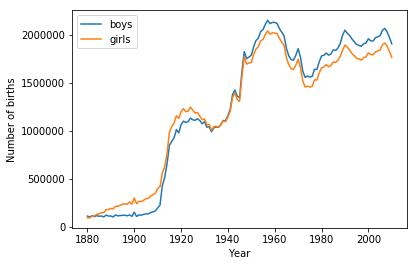

In [8]:
plot(births['year'], births['M'], marker='None', linestyle='-', label='boys')
plot(births['year'], births['F'], marker='None', linestyle='-', label='girls')
xlabel('Year')
ylabel('Number of births')
legend(loc='best')
show()

Big jumps around 1920 (after WW I) and 1960 (baby boomers?)

Another line-plot sitation shows up when we do _regression_. Regression is the idea of fitting a line (or a curve) to a scatter-plot of data. We will see regression in more detail later in the course; for now, let's just use it.

### Fit a line to the cars data.

In [9]:
# Regress the mpg values against the weight values
# We will see this in much more detail in a later lecture
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('mpg ~ wt', cars, return_type='dataframe')
result = sm.OLS(y, X).fit()

slope = result.params['wt']
intercept = result.params['Intercept']
print 'mpg = {:.4f} + {:.4f} * wt'.format(intercept, slope)

mpg = 46.2165 + -0.0076 * wt


We will discuss what slope and intercept mean in a later lecture. For now, just think of it as a prediction:

> If car weight is x, the regression predicts mpg = x * slope + intercept

So let's create a Series of regression predictions.

In [10]:
predicted = cars['wt'] * slope + intercept
regression_predictions = Series(predicted.values,
                                index=cars['wt'])
regression_predictions[:5]

wt
3821    16.996029
3850    16.774256
3672    18.135483
3265    21.247951
3410    20.139087
dtype: float64

Now, we can plot the predictions on the same plot as the actual cars.

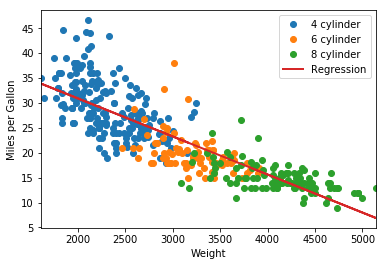

In [11]:
# Repeating the earlier plot commands
plot(c4['wt'], c4['mpg'], marker='o', linestyle='None', label='4 cylinder')
plot(c6['wt'], c6['mpg'], marker='o', linestyle='None', label='6 cylinder')
plot(c8['wt'], c8['mpg'], marker='o', linestyle='None', label='8 cylinder')

# New plot command for the regression predictions
regression_predictions.plot(label='Regression', linewidth=2)

xlabel('Weight')
ylabel('Miles per Gallon')
legend(numpoints=1, loc='best')
show()

This example also demonstrates another way of plotting in pandas. Instead of saying:

> plot(x, y)

we can say:

> Series.plot()

which is the same as:

> plot(Series.index.values, Series.values)

## Histograms

Text(0,0.5,'Frequency')

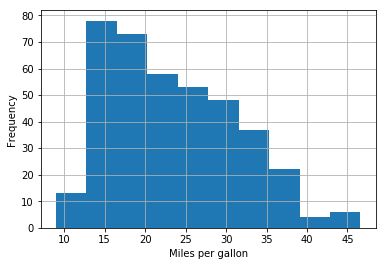

In [12]:
cars['mpg'].hist()
xlabel('Miles per gallon')
ylabel('Frequency')

> cars['mpg'].hist()

Let's go step-by-step through the histogram formation.

**Step 1: Form the bins**

* We take the cars['mpg'] Series, and then
* bin the MPGs into bins (by default, 10 bins) of equal-size.

**Step 2: Assign cars to bins**

Once we have the bins, we go down the list of MPGs in the cars['mpg'], and

* for each MPG, find the bin it falls into,
* and increase the count of that bin by 1.

Thus, the total count over all the bins is just the number of cars.

**Step 3: Plot the bins**

Finally, it plots the bins on the x-axis, and the count in each bin on the y-axis.

In fact, the histogram method is more general than this, since it allows us to differentiate between cars.

For instance, we could consider newer car models to be more important, or cars with 4-cylinder engines to be more important.

*   _What the user does:_
    * Assign to each car an _importance_ score

*   _What Pandas does:_
    * When assigning cars to histogram bins, Pandas replaces

    > increase the count of the bin by 1

    with

    > increase the _importance_ of the bin by _this car's importance_.

### Plot a _normalized_ histogram.

In a normalized histogram, the y-axis is no longer the _number_ of cars in each bin, but rather the _fraction_ of cars.

How can we do this?

Set each car's importance to be 

> importance = 1.0 / number of cars

So, if a 20 cars fall in one bin, and there are 100 cars, the total importance in that bin will be 20 / 100, which is exactly the fraction of cars in that bin.

Text(0,0.5,'Fraction of cars')

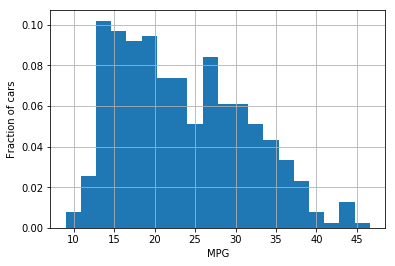

In [13]:
# Calculate importances
number_of_cars = len(cars['mpg'])
importance_of_each_car = 1.0 / number_of_cars
importance_list = [importance_of_each_car] * number_of_cars

# Plot using these importances, using the "weights" argument of hist()
cars['mpg'].hist(bins=20, weights=importance_list)
xlabel('MPG')
ylabel('Fraction of cars')

### Compare histograms of mpg and speed

Is the MPG histogram "peaked" differently than the speed histogram? We can try to plot both histograms side-by-side and see if there are differences.

How will we do this?

* how many subplots?
* share the x-axis or the y-axis?

Text(0.5,0,'Speed')

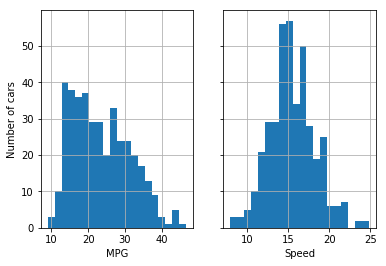

In [14]:
fig, (ax1, ax2) = subplots(nrows=1,
                           ncols=2,
                           sharey=True,
                           figsize=(6, 4))

# Plot the MPG histogram on the first subplot
cars['mpg'].hist(ax=ax1, bins=20)
ax1.set_xlabel('MPG')
ax1.set_ylabel('Number of cars')

# Plot the speed histogram on the second subplot
cars['speed'].hist(ax=ax2, bins=20)
ax2.set_xlabel('Speed')


Overall, most cars have MPG on the lower side (15-20 MPG), but speed is mostly around 15 mph. Perhaps for some cars, we get low MPG but not enough bang in terms of speed.

## Bar plots

We've already met the bar plot in earlier lectures.

_Example:_ Plot the number of cars with different number of cylinders.

Text(0,0.5,'Number of cars')

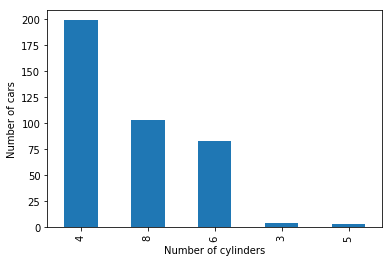

In [15]:
cylinder_counts = cars['cyl'].value_counts()
cylinder_counts.plot(kind='bar')
xlabel('Number of cylinders')
ylabel('Number of cars')

We can easily plot this as a pie chart as well. We will need the percentage of cars with each cylinder-type.

In [16]:
cylinder_percentages = cylinder_counts * 100.0 / sum(cylinder_counts)
cylinder_percentages

4    50.765306
8    26.275510
6    21.173469
3     1.020408
5     0.765306
Name: cyl, dtype: float64

(-1.1055161340232746,
 1.1002626730487273,
 -1.1100634242242517,
 1.103534683151302)

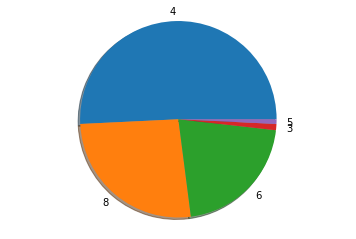

In [17]:
pie(cylinder_percentages.values,
    labels=cylinder_percentages.index.values,
    shadow=True)
axis('equal')

Let us look at one interesting dataset: the top 1000 baby names in each year from 1880 onwards. We will explore several questions on this.

In [18]:
names = pd.read_csv('Pandas_4_data/baby-names-top1000.csv')
names[:5]

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


In [19]:
names[-5:]  # last five

,year,name,percent,sex
257995,2008,Carleigh,0.000128,girl
257996,2008,Iyana,0.000128,girl
257997,2008,Kenley,0.000127,girl
257998,2008,Sloane,0.000127,girl
257999,2008,Elianna,0.000127,girl


Names from 1880 until 2008, so 129 years.

### Which baby names are in the top-1000 list most often?

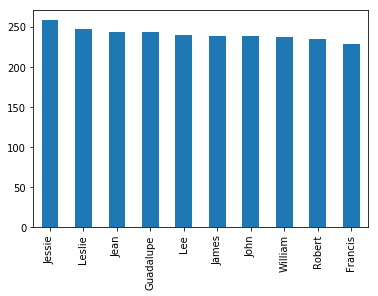

In [20]:
names['name'].value_counts()[:10].plot(kind='bar')

**Wait, what?** There are only 129 years, so how can Jessie show up 250 times?

Let's find the most popular names for boys only.

In [21]:
common_boy_names = names[names['sex'] == 'boy']['name'].value_counts()
common_boy_names[:15]

Joshua       129
Melvin       129
Elliott      129
Jerry        129
James        129
Ralph        129
Stanley      129
Cornelius    129
Lee          129
Eli          129
Raymond      129
Paul         129
Owen         129
Leo          129
Wayne        129
Name: name, dtype: int64

Some names are evergreen...

### How many names are super-popular, medium-popular, less-popular?

Text(0,0.5,'Number of names')

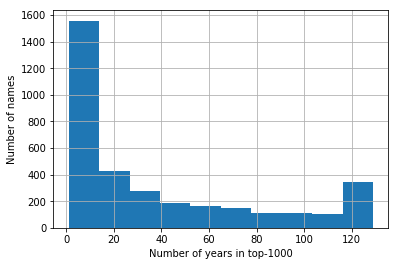

In [22]:
common_boy_names.hist()
xlabel('Number of years in top-1000')
ylabel('Number of names')

There are two peaks: (a) almost unique names, and (b) evergreen names. However, there are very few names that _just_ missed out on being evergreen. Let's see what these are.

In [23]:
common_boy_names[common_boy_names == 100]  # Common for 100 years, but not 129 years.

Sammy     100
Arturo    100
Emery     100
Walker    100
Name: name, dtype: int64

Let's see how their popularity changed over time. But for that, we need the popularity timeline for these names.

### How do we get a timeline for each name?

In [24]:
boy_names = names[names['sex'] == 'boy']
boy_names[:3]

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy


In [25]:
year_name_pivot = pd.pivot_table(boy_names,
                                 index='year',
                                 columns='name',
                                 values='percent')

year_name_pivot.iloc[:5, :5]

name,Aaden,Aarav,Aaron,Ab,Abb
year,,,,,
1880,NaN,NaN,0.000861,0.000042,NaN
1881,NaN,NaN,0.000868,0.000037,NaN
1882,NaN,NaN,0.000697,0.000041,NaN
1883,NaN,NaN,0.000933,NaN,NaN
1884,NaN,NaN,0.000790,NaN,0.000041


In [26]:
# Let's fill in the missing values with 0
year_name_pivot = year_name_pivot.fillna(0)

In [27]:
year_name_pivot[['Sammy', 'Arturo', 'Emery', 'Walker']][:5]

name,Sammy,Arturo,Emery,Walker
year,,,,
1880,0.0,0.0,0.000439,0.000245
1881,0.0,0.0,0.000489,0.000231
1882,0.0,0.0,0.000434,0.000229
1883,0.0,0.0,0.000382,0.000178
1884,0.0,0.0,0.000415,0.000155


Now we can plot these timelines. That means four subplots. We could again do:

    fig, (ax1, ax2, ax3, ax4) = subplots(nrows=4,
                                         ncols=1,
                                         sharex=True,
                                         sharey=True,
                                         figsize=(8, 12))
    
    year_name_pivot['Sammy'].plot(ax=ax1)
    year_name_pivot['Arturo'].plot(ax=ax2)
    year_name_pivot['Emery'].plot(ax=ax3)
    year_name_pivot['Walker'].plot(ax=ax4)

Instead, we use the fact that all of these are in a DataFrame, and pandas knows how to plot DataFrames nicely!

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000020FCFF60>,
      dtype=object)

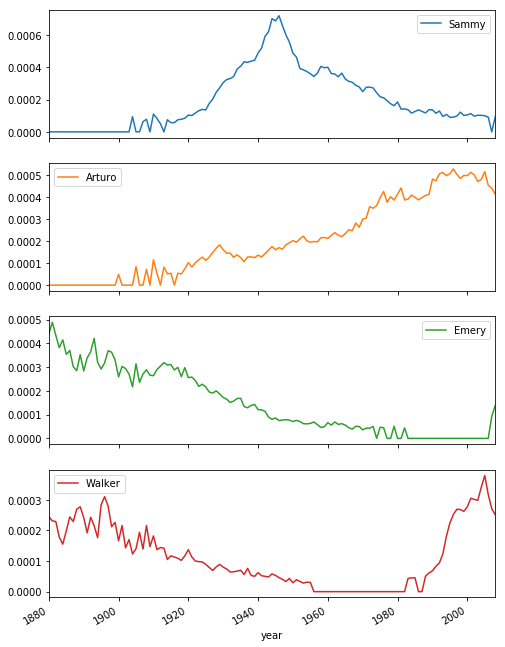

In [28]:
year_name_pivot[['Sammy', 'Arturo', 'Emery', 'Walker']].plot(subplots=True, figsize=(8, 12))

### Find the names that were the most popular in at least one year.

In [29]:
name_year = year_name_pivot.T
top_names = name_year.idxmax()
top_names[:5]

year
1880    John
1881    John
1882    John
1883    John
1884    John
dtype: object

In [30]:
top_names.value_counts()

Michael    44
John       44
Robert     17
James      13
Jacob      10
David       1
dtype: int64

In [31]:
most_popular_names = top_names.value_counts().index.values
most_popular_names

array(['Michael', 'John', 'Robert', 'James', 'Jacob', 'David'],
      dtype=object)

<br />
Let's plot the popularities of these 6 names from 1880 to present.

In [32]:
all_years = year_name_pivot.index.values

# Let's pick a manageable sample of years
sample_years = all_years[::10]  # one in 10 years.
sample_years

array([1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980,
       1990, 2000], dtype=int64)

In [33]:
# Create a DataFrame with just this information
df = year_name_pivot[most_popular_names].loc[sample_years]
df

name,Michael,John,Robert,James,Jacob,David
year,,,,,,
1880,0.002990,0.081541,0.020404,0.050057,0.003412,0.007339
1890,0.003300,0.071034,0.021236,0.042580,0.002423,0.006107
1900,0.003081,0.060619,0.023608,0.044677,0.001436,0.005515
1910,0.004049,0.054914,0.026896,0.044092,0.001310,0.006034
1920,0.003626,0.051710,0.044224,0.043550,0.000952,0.006757
1930,0.003136,0.046417,0.055021,0.047781,0.000550,0.010864
1940,0.011153,0.046173,0.051586,0.052662,0.000434,0.023344
1950,0.035810,0.043655,0.045930,0.047336,0.000256,0.033382
1960,0.038868,0.035145,0.033415,0.035483,0.000227,0.039669


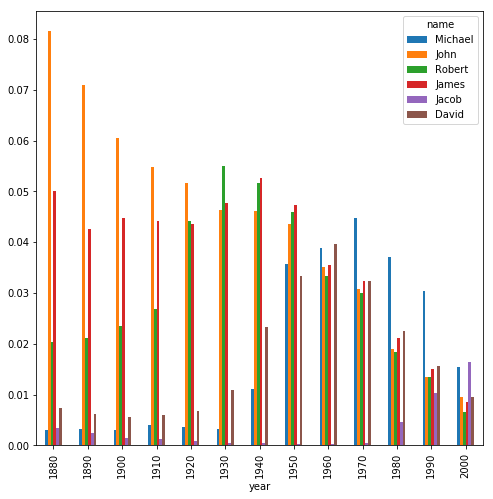

In [34]:
# Plot this as a bar plot
df.plot(kind='bar', figsize=(8, 8))

When we do

    Series.plot(kind='bar')

it plots a normal bar plot. Instead, when we do

    DataFrame.plot(kind='bar')

it plots each column (i.e., each Series) in the bar plot.

## Doing plots with style

Sometimes you want funky. Just because.

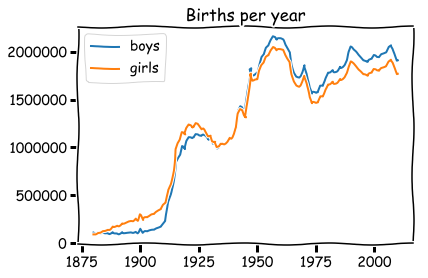

In [35]:
# Redoing births over time, xkcd style
xkcd()  # <-- Woo!

plot(births['year'], births['M'], marker='None', linestyle='-', label='boys')
plot(births['year'], births['F'], marker='None', linestyle='-', label='girls')
title('Births per year')
legend(loc='best')
show()